# Исследование о продаже компьютерных игры в интернет-магазине

В нашем распоряжение из открытых источников попал датасет содержащий информацию о проданных играх с 1980-2016 гг., оценках пользователей и экспертов, жанрах и платформах. Необходимо выявить определяющие успешность игры закономерности. Это позволит интернет-магазину "Стримчик" сделать ставку на наиболее популярные игры и спланировать рекламные кампании.

**Цель исследования — выявить какие факторы влияют на успех видео игр в различных регионах.**

Исследование будет проходить в 6 этапов:

 1) Обзор данных. Данные хранящиеся в датасете `games.csv`, проверим на пропуски и корректность заполнения.

 2) Предобработка данных. Выявленные в предыдущем этапе пропуски и ошибки, необходимо по возможности заполнить или удалить.

 3) Проведение исследовательского анализа. Необходимо провести исследовательский анализ, а также ответить на следующие вопросы:

 * Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 * Как менялись продажи по платформам и за какой характерный срок появляются новые и исчезают старые платформы?
 * Какие платформы лидируют по продажам, растут или падают?
 * Что можно сказать о самых прибыльных жанрах и выделяются ли жанры с высокими и низкими продажами?
     
     
 4) Составление портрета пользователя каждого региона (NA, EU, JP).


 * Самые популярные платформы (топ-5).
 * Самые популярные жанры (топ-5).
 * Влияет ли рейтинг ESRB на продажи в отдельном регионе?


 5) Проверка гипотез.


 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные


 6) Общий вывод. Подведение итогов по выполненному исследованию.

## Обзор данных

Подключаем библиотеки и импортируем базу данных `games.csv`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
import seaborn as sns
from scipy import stats as st
import numpy as np
from scipy.stats import linregress
import os

pth1 = 'games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

Выводим общую информацию по таблице

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов с типами данных — float, object
 * Name — название игры
 * Platform — платформа
 * Year_of_Release — год выпуска
 * Genre — жанр игры
 * NA_sales — продажи в Северной Америке (миллионы проданных копий)
 * EU_sales — продажи в Европе (миллионы проданных копий)
 * JP_sales — продажи в Японии (миллионы проданных копий)
 * Other_sales — продажи в других странах (миллионы проданных копий)
 * Critic_Score — оценка критиков (максимум 100)
 * User_Score — оценка пользователей (максимум 10)
 * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

 Количество значений в столбцах различаются, следовательно **есть пропущенные значения**

In [ ]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


По представленным 20 строкам датафрейма можно сказать, что:
 * В основном пропуски присутствуют в столбцах `Critic_Score`, `User_Score`, `Rating`, которые необходимо будет заполнить или пропустить
 * Не соответствие типа данных и заполненой информации в столбцах `Year_of_Release`, `User_Score`

### Вывод

При ознакомленлении с датафреймом `games.csv`, было установленно что он содержит информацию о видео играх, количестве проданных копий по миру и рейтинг оценок пользователей и критиков и т.д.
Имеется большое количество пропусков в ряде столбцов и не соответствие типов информации.
На стадии предобработки необходимо:
 1. Заполнить отсутсвующую информацию, либо оставить пропуски
 2. Выявить явные и неявные дубликаты, исправить либо удалить их, если они есть
 3. Привести к необходимому типу данных информацию в некоторых столбцах
 4. Выявить аномальные значения, исправить либо удалить

## Предобработка данных

Приведем название столбцов к общему регистру

In [ ]:
data.rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release',
                       'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales',
                       'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score',
                       'Rating':'rating'}, inplace = True )
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Подсчитаем количество пропусков по каждому столбцу

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Проверим датасет на наличие явных дубликатов.

In [ ]:
data.duplicated().sum()

0

Явных дубликатов не обнаруженно

Проверим наличие неявных дубликатов в столбцах

In [ ]:
data.value_counts('platform')

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
dtype: int64

In [ ]:
data.value_counts('genre')

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
dtype: int64

In [ ]:
data.value_counts('year_of_release')

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
dtype: int64

Преобразуем названия игр в один регистр, для выявления дубликатов

In [ ]:
data['name'] = data['name'].str.lower()

Проверим дубликаты по сумме ключевых столбцов

In [ ]:
display(data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])
#data.query('name=="Madden NFL 13" and platform=="PS3" and eu_sales==0.22')['eu_sales'] +=0.01

data.loc[(data['name']=='madden nfl 13') & (data['platform']=='PS3') & (data['eu_sales']==0.22), 'eu_sales']+=0.01
#data.value_counts('name')
#data.query('name=="Need for Speed: Most Wanted"')
#data = data.groupby(['name', 'platform', 'year_of_release']).agg({'eu_sales': ['sum']}).reset_index()
#data = data.rename(columns = { 'eu_sales sum':'eu_sales'}, inplace = True )
#data.columns = ['name', 'platform', 'year_of_release',
#                'genre', 'na_sales', 'eu_sales', 'jp_sales',
#                'other_sales', 'critic_score', 'user_score', 'rating']
#data
#data.loc[(data['name']!='Madden NFL 13') & (data['platform']!='PS3') & (data['eu_sales']!=0.01) & (data['rating']!='E') ]
display(data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])

data = data.drop([16230])
display(data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])
data.query('name=="madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.23,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
3986,madden nfl 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,madden nfl 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,madden nfl 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


Просмотрим количество пропусков в столбце `name`

In [ ]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строки датафрейма можно удалить, так как продажи по данным играм незначительные, также при их удалении мы уберем пропуски в столбце `genre`

Удалим строки без названия игр

In [ ]:
data= data[~(data['name'].isna())]

Удалим строки без года выпуска игры и преобразуем столбец в тип `int`

In [ ]:
data = data[~(data['year_of_release'].isna())]
data['year_of_release'] = data['year_of_release'].astype(int)


Значения `tbd` (to be determined = будет определено) столбца `user_score` были переназначены в NaN.
Столбец преобразован в тип float

In [ ]:
data.loc[data['user_score']=='tbd', 'user_score']='NaN'
data['user_score'] = data['user_score'].astype(float)

Оценки критиков преобразованны в формат схожий с форматом оценки пользователей, так как они не выставляли дробную часть.

In [ ]:
data.loc[~(data['user_score']=='NaN'), 'user_score'] = \
    data.loc[~(data['user_score']=='NaN'), 'user_score'] * 10

Посчитаем все продажи в регионах и занесем их в отдельный столбец `all_sales`

In [ ]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Просмотрим частоту выставления играм различных рейтингов

In [ ]:
display(data.value_counts('rating'))
print('Количество игр без рейтинга',data.rating.isna().sum())

rating
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
dtype: int64

Количество игр без рейтинга 6676


В столбце `rating` заменим значение `K-A`("Kids to Adults") на `E`("Everyone"), так как оно является устаревшим обозначением.

In [ ]:
data.loc[data['rating']=='K-A', 'rating']='E'

В столбце `rating` заменим значение `EC` («Early childhood») — «Для детей младшего возраста» на `E`("Everyone"), так как оно подходит под эту категорию.

In [ ]:
data.loc[data['rating']=='EC', 'rating']='E'

Так же в столбце `rating` можно объединить рейтинги `AO` («Adults Only 18+») — «Только для взрослых» и «M» («Mature») — «Для взрослых», из-за небольшого различия в возврастных ограничениях (`M` для лиц от 17 лет, `AO` для лиц от 18 лет) и всего у одной игры стоит рейтинг `AO`.

In [ ]:
data.loc[data['rating']=='AO', 'rating']='M'

Играм без рейтинга был присвоен рейтинг `no rating`, так как невозможно на основе имеющихся данных подставить рейтинг из ESRB

In [ ]:
data.loc[data['rating'].isna(), 'rating'] ='no rating'

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод

После проведения предобработки были устранены следущие ошибки:

 1) Названия столбцов приведены к общему виду (snake_case)

 2) Удалены неявные дубликаты игр

 3) Удалены строки с пропусками в столбцах `name`(название игры) и `year_of_release`(дата выхода игры).

 4) Значения `tbd` было перезаписано в NaN, так как аббревиатура это и означает.

 5) Столбцы `user_score`, `year_of_release` преобразованы в подходящие форматы, в столбце `critic_score` оценки были приведены из десяток в единицы.

 6) Пропуски в столбце `rating` заменены на `no rating` в остальных столбцах были пропущенны, так как не хватает данных для их восстановления, а заполнение средним или медианой сильно исказит информацию и приведет к неверным выводам.

 7) Создан новый столбец `all_sales` содержащий информацию о количестве проданных копий игры во всех регионах.

 8) В столбце `rating` заменили значение `K-A` на `E`, так как оно является устаревшим обозначением. Значение `EC` заменили  на `E`, так как оно подходит под эту категорию. Заменили значение `AO` на `M` так как возврастное ограничение почти одинаковое.

Часть пропусков в столбце `rating` можно объяснить тем, что рейтинг играм начал выдаваться с 1994 с основания Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр.

Также часть пропусков в столбцах `critic_score` и `user_score`, можно объяснить, что в самом начале у игр не было большего количества поклонников и коммьюнити было слабо развито, сфера видео игр, только начинала свое развитие. Но в более поздних играх отсутствие заполнения можно объяснить человеческим фактором при заполнение базы данных или не популярностью игры и незаинтересованностью игроков и критиков в выставлении оценок.

##  Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

In [ ]:
display('Данные по играм за все года',data.groupby('year_of_release')['name'].count().reset_index().describe())
display('Данные по играм с 1995 года',data.groupby('year_of_release')['name'].count().reset_index().query('year_of_release>1994').describe())

'Данные по играм за все года'

,year_of_release,name
count,37.000000,37.000000
mean,1998.000000,444.405405
std,10.824355,451.591535
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


'Данные по играм с 1995 года'

,year_of_release,name
count,22.000000,22.000000
mean,2005.500000,725.318182
std,6.493587,380.957489
min,1995.000000,219.000000
25%,2000.250000,404.750000
50%,2005.500000,629.000000
75%,2010.750000,989.250000
max,2016.000000,1427.000000


[Text(0.5, 0, 'Количество вышедших игр'), Text(0, 0.5, 'год выпуска')]

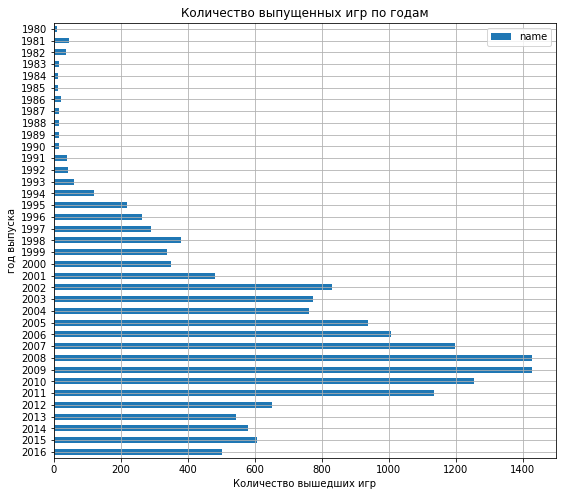

In [ ]:
data.groupby('year_of_release')['name'].count().reset_index().sort_values('year_of_release', ascending=False).plot(y='name', x ='year_of_release', kind='barh', grid=True, figsize=(9,8), title='Количество выпущенных игр по годам').set(xlabel='Количество вышедших игр', ylabel='год выпуска')

По данному графику можно сказать, что самыми популярными годами по выпуску игр были 2008 и 2009. Период с 1980-1994гг. можно неучитывать, так как это было начало индустрии и в пике за этот период не было выпущено больше 130 игр. В среднем после 1994 года выходит более 720 игр.

### Как менялись продажи по платформам

Посчитаем первые 10 платформ по количеству проданных на них игр

In [ ]:
top_platform = data.groupby('platform')['all_sales'].sum().reset_index().sort_values('all_sales', ascending=False).head(10)
top_platform

,platform,all_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


(1993.0, 2017.0)

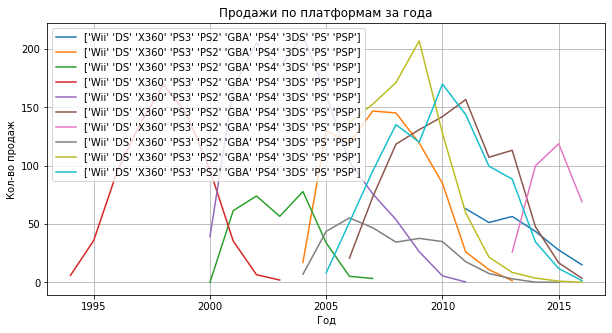

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data.query('platform in @top_platform.platform').pivot_table(
    index='year_of_release',
    columns='platform',
    values='all_sales',aggfunc='sum'), label= data.query('platform in @top_platform.platform')['platform'].unique())
plt.grid()
plt.legend(loc='upper left')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')
plt.title('Продажи по платформам за года')
plt.xlim([1993, 2017])


По данному графику можно сказать, что новые платформы в течении 2-3 лет входят в пик по проданным играм. В среднем платформы пользуются популярностью около 10 лет.

### Какие платформы потенциально прибыльные

Потенциально прибыльными платформами будут считаться платформы у которых суммарные продажи с 2012 по 2015 превышают 15млн. проданных копий.

In [ ]:
top_platform = \
data.query('year_of_release>2012 and year_of_release<2016').groupby('platform')['all_sales'].sum().reset_index().sort_values('all_sales', ascending=False).query('all_sales>15')

data.query('year_of_release>2012 and year_of_release<2016').groupby('platform')['all_sales'].sum().reset_index().sort_values('all_sales', ascending=False).query('all_sales>15')

,platform,all_sales
4,PS4,244.89
3,PS3,177.83
9,X360,135.28
10,XOne,133.17
0,3DS,128.11
8,WiiU,60.03
2,PC,34.18
6,PSV,28.74


Создадим переменную, в которой будут актуальные платформы для дальнейших исследований

In [ ]:
top_8_platform=data.query('platform in ("PS4","PS3","X360","XOne","3DS","WiiU","PC","PSV") and  year_of_release>2012 and year_of_release<2016')

(2013.0, 2015.0)

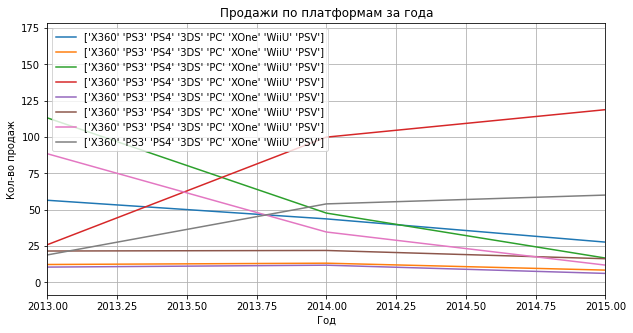

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data.query('platform in @top_platform.platform').pivot_table(
    index='year_of_release',
    columns='platform',
    values='all_sales',aggfunc='sum'), label= data.query('platform in @top_platform.platform')['platform'].unique())
plt.grid()
plt.legend(loc='upper left')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')
plt.title('Продажи по платформам за года')
plt.xlim([2013, 2015])

По данным на графике можно увидеть как изменились продажи игр на конкретные приставки с 2012 по 2015 год:

1) PS4. Это потенциально прибыльная приставка, вышла в 2013 году, занимает первое место по суммарным продажам за 3 года.

2) PS3. Предшественник PS4, вышла в 2006 году, но все ещё актуальна, проданные копии видеоигр за последние 3 года составляют 177.83 млн.

3) X360. Платформа вышла в 2006 году. Проданные копии видеоигр за последние 3 года составляют 135.28 млн.

4) xOne. Последняя платформа серии Xbox, вышла в 2013 году, но не смогла обойти своего предшественника(X360) по продажам. Суммарные продажи за 3 года составляют 133.17 млн.

5) 3DS. Занимает первое по суммарным продажам за 3 года среди портативных платформ. Продажи составили 128.11 млн копий видеоигр.

6) WiiU. Платформа вышла в 2012 году. Проданные копии видеоигр за последние 3 года составляют 60.03 млн.

7) PC. Более 30 лет на рынке игровых платформ.Суммарные продажи составляют более 250 млн. проданных копий видеоигр, это не так много в сравнении с другими платформами, однако эта платформа набирает популярность, за последние три года на неё было продано 34.18 млн. копий игр.

8) PSV. Также как и 3DS является портативной платформой, за последние три года на неё было продано 28.74 млн. видеоигр.


### Глобальные продажи игр в разбивке по платформам

Построим график `boxplot`, чтобы посмотреть как распределяются проданные копии видеоигр, а также выбросы.

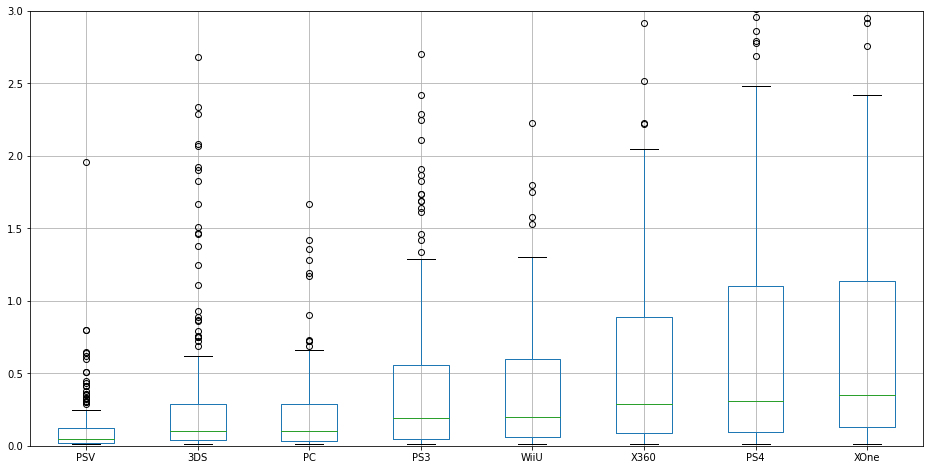

In [ ]:

def boxplot_sort(data,column,by):
    data2 = pd.DataFrame({col:vals[column] for col, vals in data.groupby(by)})
    med = data2.median().sort_values(ascending=True)
    data2[med.index].boxplot()

fig, ax = plt.subplots(figsize=(16,8))
boxplot_sort(top_8_platform, column='all_sales', by='platform')
ax.set_ylim(0,3)
plt.show()


Посмотрим максимальные выбросы

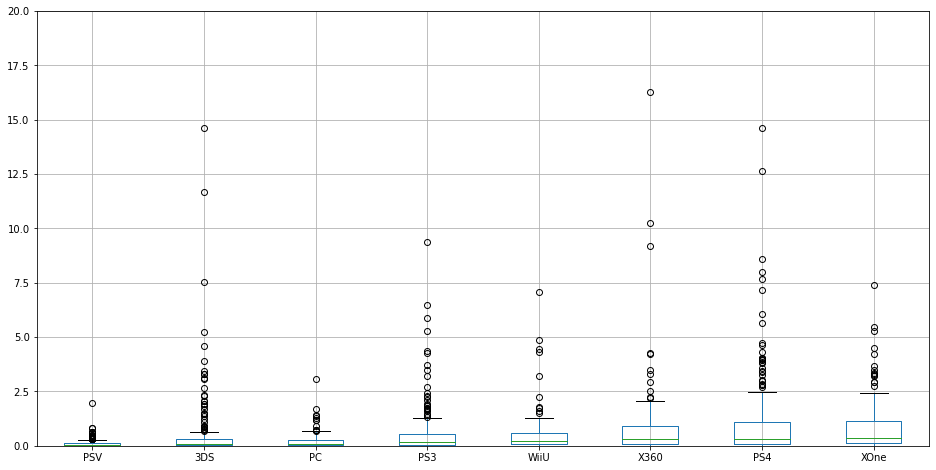

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
boxplot_sort(top_8_platform, column='all_sales', by='platform')
ax.set_ylim(0,20)
plt.show()

Из графиков видно, что половина игр вышедших на платформу XOne продавались в количестве от 0.15 до 1.07 млн копий. Следом идет PS4, половина игр продалавались в диапозоне от 0.13 до 1.05. Большие выбросы наблюдаюся у платформ X360, PS4 и 3DS. Рекордный выброс был X360, у одной игры было проданно 16 млн. копий. В основном игры продаются до 2.5 млн. копий.

### Как влияют на продажи отзывы пользователей и критиков

Для исследования была выбрана платформа PS4 из-за большого количества проданных копий игр на неё в период  2013-2015гг.

Просмотрим числовые характеристики

In [ ]:
top_8_platform.query('platform=="PS4"')[['all_sales','critic_score','user_score']].describe()

,all_sales,critic_score,user_score
count,228.000000,154.000000,156.000000
mean,1.074079,72.357143,66.666667
std,1.899788,12.621529,14.492416
min,0.010000,19.000000,15.000000
25%,0.097500,66.000000,61.000000
50%,0.310000,74.000000,69.500000
75%,1.105000,81.000000,77.000000
max,14.630000,97.000000,92.000000


Самое большое число копий игры проданной на платформе PS4 14.63 млн. В среднем продается 1.07 млн. копий одной игры. Пользователи и критики высоко оценивают игры, в среднем 69 балла со стороны игроков и 74 со стороны критиков.

Построим гистограммы

array([[<AxesSubplot:title={'center':'all_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>],
       [<AxesSubplot:title={'center':'user_score'}>, <AxesSubplot:>]],
      dtype=object)

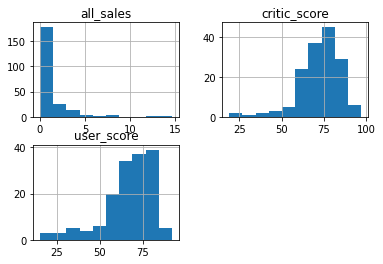

In [ ]:
top_8_platform.query('platform=="PS4"')[['all_sales','critic_score','user_score']].hist()

(50.0, 100.0)

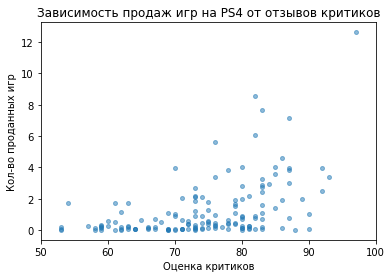

In [ ]:

plt.plot(top_8_platform.query('platform=="PS4"')['critic_score'],
         top_8_platform.query('platform=="PS4"')['all_sales'], 'o', alpha=0.5, markersize=4)
plt.xlabel('Оценка критиков')
plt.ylabel('Кол-во проданных игр')
plt.title('Зависимость продаж игр на PS4 от отзывов критиков')
plt.xlim([50, 100])


На графике заметна слабая связь между оценками критиков и кол-вом проданных игр. Чем выше оценка критиков, тем больше проданно игр.

Text(0.5, 1.0, 'Зависимость продаж игр на PS4 от отзывов игроков')

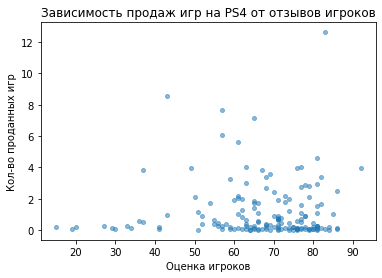

In [ ]:
plt.plot(top_8_platform.query('platform=="PS4"')['user_score'],
         top_8_platform.query('platform=="PS4"')['all_sales'], 'o', alpha=0.5, markersize=4)
plt.xlabel('Оценка игроков')
plt.ylabel('Кол-во проданных игр')
plt.title('Зависимость продаж игр на PS4 от отзывов игроков')

Связи между оценками и количеством проданных игр на PS4 не видно

Построим ещё несколько диаграмм рассеивания по случайном выбранным платформам из выборки

Платформа <b>X360</b>

Text(0.5, 1.0, 'Зависимость продаж игр на X360 от отзывов критиков')

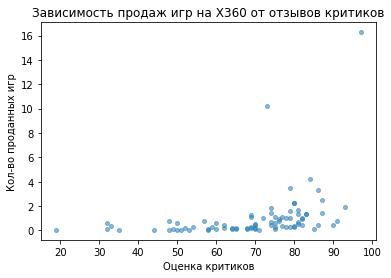

In [ ]:
plt.plot(top_8_platform.query('platform=="X360"')['critic_score'],
         top_8_platform.query('platform=="X360"')['all_sales'], 'o', alpha=0.5, markersize=4)
plt.xlabel('Оценка критиков')
plt.ylabel('Кол-во проданных игр')
plt.title('Зависимость продаж игр на X360 от отзывов критиков')


Заметна слабая связь между оценками критиков и продажми игр на Xbox

Text(0.5, 1.0, 'Зависимость продаж игр на X360 от отзывов игроков')

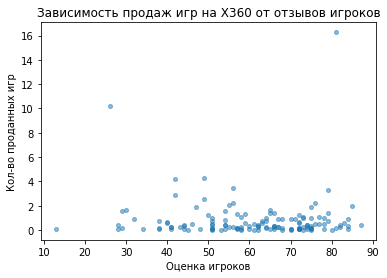

In [ ]:
plt.plot(top_8_platform.query('platform=="X360"')['user_score'],
         top_8_platform.query('platform=="X360"')['all_sales'], 'o', alpha=0.5, markersize=4)
plt.xlabel('Оценка игроков')
plt.ylabel('Кол-во проданных игр')
plt.title('Зависимость продаж игр на X360 от отзывов игроков')

Связи между оценками и количеством проданных игр на X360 не видно

Платформа <b>3DS</b>

Text(0.5, 1.0, 'Зависимость продаж игр на 3DS от отзывов критиков')

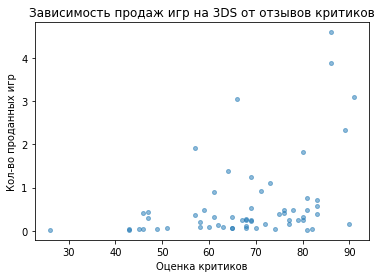

In [ ]:
plt.plot(top_8_platform.query('platform=="3DS"')['critic_score'],
         top_8_platform.query('platform=="3DS"')['all_sales'], 'o', alpha=0.5, markersize=4)
plt.xlabel('Оценка критиков')
plt.ylabel('Кол-во проданных игр')
plt.title('Зависимость продаж игр на 3DS от отзывов критиков')

Заметна слабая связь между оценками критиков и продажми игр на 3DS

Text(0.5, 1.0, 'Зависимость продаж игр на 3DS от отзывов игроков')

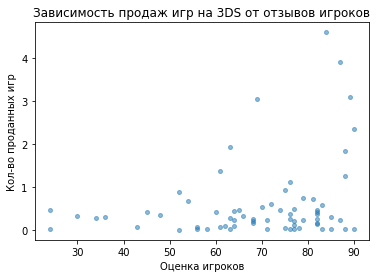

In [ ]:
plt.plot(top_8_platform.query('platform=="3DS"')['user_score'],
         top_8_platform.query('platform=="3DS"')['all_sales'], 'o', alpha=0.5, markersize=4)
plt.xlabel('Оценка игроков')
plt.ylabel('Кол-во проданных игр')
plt.title('Зависимость продаж игр на 3DS от отзывов игроков')

Связи между оценками и количеством проданных игр на 3DS не видно

In [ ]:
top_8_platform.query('platform=="PS4"')[['all_sales','critic_score','user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.431848,0.024231
critic_score,0.431848,1.000000,0.612451
user_score,0.024231,0.612451,1.000000


Корреляции между оценками пользователей и количеством проданных игр слишком маленькая, чтобы делать вывод, что оценка пользователей влияет на продажи. Корреляция между оценками критиков и количеством проданных игр, также незначительна 0.43.

Посчитаем корреляцию ещё на 3 платформах, чтобы проверить теорию

In [ ]:
top_8_platform.query('platform=="X360"')[['all_sales','critic_score','user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.350345,-0.034562
critic_score,0.350345,1.000000,0.520946
user_score,-0.034562,0.520946,1.000000


In [ ]:
top_8_platform.query('platform=="3DS"')[['all_sales','critic_score','user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.384326,0.264711
critic_score,0.384326,1.000000,0.776471
user_score,0.264711,0.776471,1.000000


In [ ]:
top_8_platform.query('platform=="PS3"')[['all_sales','critic_score','user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.334285,-0.016333
critic_score,0.334285,1.000000,0.599920
user_score,-0.016333,0.599920,1.000000


Как видно из представленных выше сравнений, корреляция не превышает необходимого порога, чтобы можно было сказать, что оценки влияют на продаваемость игр.
Вывод оценки не влияют на продаваемость игр, но видна корреляция между оценками пользователей и критиков, возможно кто-то опирается при выставлении оценки игре на чужое мнение или общий рейтинг игры.

### Общее распределение игр по жанрам

Просмотрим как игры распределяются по жанрам

genre
Action          566
Role-Playing    231
Sports          157
Adventure       154
Shooter         140
Misc            108
Fighting         63
Racing           61
Platform         55
Simulation       42
Strategy         41
Puzzle           16
dtype: int64


[Text(0, 0.5, '')]

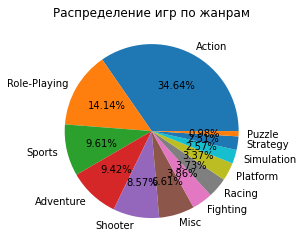

In [ ]:
print(top_8_platform.value_counts('genre'))
top_8_platform.value_counts('genre').plot(kind='pie', y='genre',autopct='%.2f%%', title='Распределение игр по жанрам').set(ylabel='')

Чаще всего игры выпускаются в жанрах `Action`(34.64%), `Role-Playing`(14.14%), `Sports`(9.61%). Реже всего игры делают в жанре `Puzzle`(0.98%).

Суммарные продажи по жанрам на основе данных из выборки

In [ ]:
top_8_platform.groupby('genre')['all_sales'].sum().reset_index().sort_values('all_sales', ascending=False)

,genre,all_sales
0,Action,287.58
8,Shooter,194.76
7,Role-Playing,126.68
10,Sports,125.49
3,Misc,53.09
6,Racing,37.10
4,Platform,36.46
2,Fighting,30.82
9,Simulation,19.52
1,Adventure,18.90


Посмотрим распрделение проданных игр по жанрам

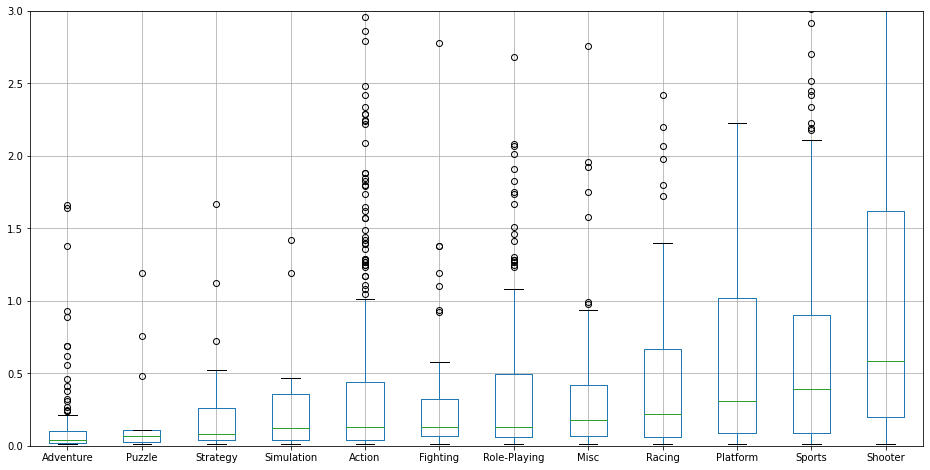

In [ ]:
def boxplot_sort(data,column,by):
    data2 = pd.DataFrame({col:vals[column] for col, vals in data.groupby(by)})
    med = data2.median().sort_values(ascending=True)
    data2[med.index].boxplot()

fig, ax = plt.subplots(figsize=(16,8))
boxplot_sort(top_8_platform, column='all_sales', by='genre')
ax.set_ylim(0,3)
plt.show()

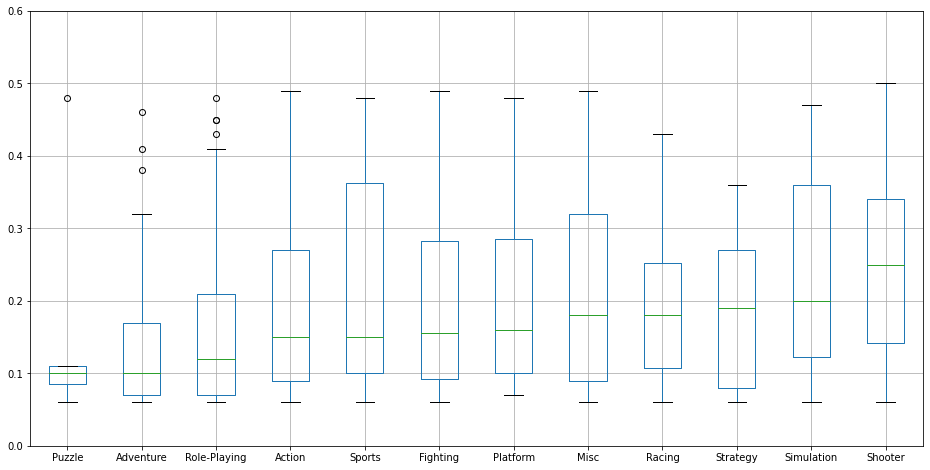

In [ ]:
Q1 =  top_8_platform['all_sales'].quantile(0.25)
Q3 = top_8_platform['all_sales'].quantile(0.75)
IQR = Q3 - Q1

def boxplot_sort(data,column,by):
    data2 = pd.DataFrame({col:vals[column] for col, vals in data.groupby(by)})
    med = data2.median().sort_values(ascending=True)
    data2[med.index].boxplot()

fig, ax = plt.subplots(figsize=(16,8))
boxplot_sort(top_8_platform[(top_8_platform['all_sales'] > Q1) & (top_8_platform['all_sales'] < Q3)], column='all_sales',
             by='genre')
ax.set_ylim(0,0.6)
plt.show()

По диаграмме размаха видно, что самыми успешными жанрами по медианным продажам являются жанры `Shooter`, `Simulation`,`Strategy`,`Racing`и `Misc`. Самыми стабильными и успешно продающимися жанрами являются `Shooter`, `Simulation`.

#### Вывод:

В ходе проведения исследовательского анализа было выявленно:

 1) В среднем в год выходит более 720 игр

 2) Новые платформы в течении 2-3 лет входят в пик по проданным играм. В среднем платформы пользуются популярностью около 10 лет.

 3) Был выбран актуальный период с 2013-2015гг. и минимальный порог проданных игр(от 15 млн.) на платформу. В результате были отобранны 8 платформ(PS4, PS3, X360, XOne, 3DS, WiiU, PSV) с которым производился дальнейший анализ
  
 4) В основном игры продаются до 2.5 млн. копий. Большие выбросы наблюдаюся у платформ X360, PS4 и 3DS за установленный период.

 5) Также выяснилось, что мнение критиков и игроков не влияет на покупаемость игр.

 6) Самыми успешными жанрами по медианным продажам являются жанры `Shooter`, `Simulation`,`Strategy`,`Racing`и `Misc`. Самыми стабильными и успешно продающимися жанрами являются `Shooter`, `Simulation`.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

In [ ]:
year_sort = data.query('year_of_release>2012 and year_of_release<2016')

year_sort_na =year_sort.copy()
top_na=year_sort_na.groupby('platform')['na_sales'].sum().reset_index().sort_values('na_sales',
                                                                                    ascending=False).head(5)['platform'].tolist()

year_sort_na['platform'] = year_sort_na['platform'].where(year_sort_na['platform'].isin(top_na), other='other')
year_sort_na = year_sort_na.groupby('platform')['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)

year_sort_eu =year_sort.copy()
top_eu=year_sort_eu.groupby('platform')['eu_sales'].sum().reset_index().sort_values('eu_sales',
                                                                                    ascending=False).head(5)['platform'].tolist()

year_sort_eu['platform'] = year_sort_eu['platform'].where(year_sort_eu['platform'].isin(top_eu), other='other')
year_sort_eu = year_sort_eu.groupby('platform')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)

year_sort_jp =year_sort.copy()
top_jp=year_sort_jp.groupby('platform')['jp_sales'].sum().reset_index().sort_values('jp_sales',
                                                                                    ascending=False).head(5)['platform'].tolist()

year_sort_jp['platform'] = year_sort_jp['platform'].where(year_sort_jp['platform'].isin(top_jp), other='other')
year_sort_jp = year_sort_jp.groupby('platform')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)



Text(0.5, 1.0, 'регион JP')

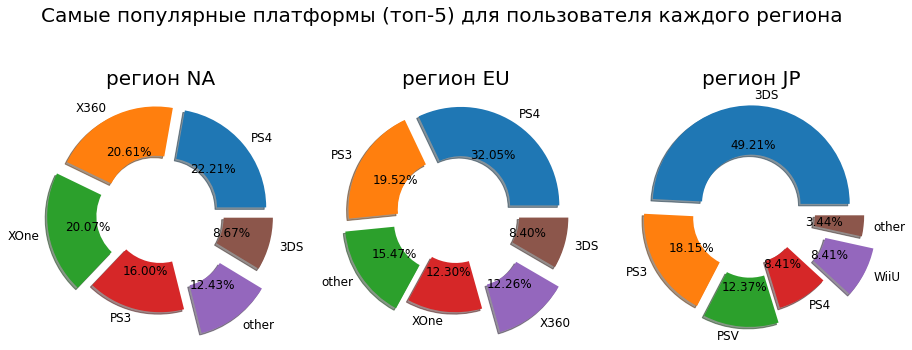

In [ ]:

    labels_na = ["PS4", "X360", "XOne", "PS3", "other","3DS"]
    labels_eu = ["PS4", "PS3", "other", "XOne", "X360","3DS"]
    labels_jp = ["3DS", "PS3", "PSV", "PS4", "WiiU","other"]
    explode = (0.1, 0.1, 0.15, 0, 0.3, 0.15)
    plt.figure(figsize=(15, 15))
    plt.rc('font', size=12) #controls default text size
    plt.rc('axes', titlesize=20) #fontsize of the title
    plt.rc('axes', labelsize=10) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
    plt.suptitle('Самые популярные платформы (топ-5) для пользователя каждого региона',fontsize = 20,y=0.9)

    plt.subplot(2, 3, 1)
    plt.pie(year_sort_na['na_sales'], autopct='%.2f%%', labels=labels_na,explode=explode, wedgeprops=dict(width=0.5),
            shadow=True)
    plt.title("регион NA")

    # !!! Текущая ячейка - 2
    plt.subplot(2, 3, 2)
    plt.pie(year_sort_eu['eu_sales'], autopct='%.2f%%', labels=labels_eu,explode=explode, wedgeprops=dict(width=0.5),
            shadow=True)
    plt.title("регион EU")

    # !!! Текущая ячейка - 3
    plt.subplot(2, 3, 3)
    plt.pie(year_sort_jp['jp_sales'], autopct='%.2f%%', labels=labels_jp,explode=explode, wedgeprops=dict(width=0.5),
            shadow=True)
    plt.title("регион JP")

Text(0.5, 1.0, 'регион JP')

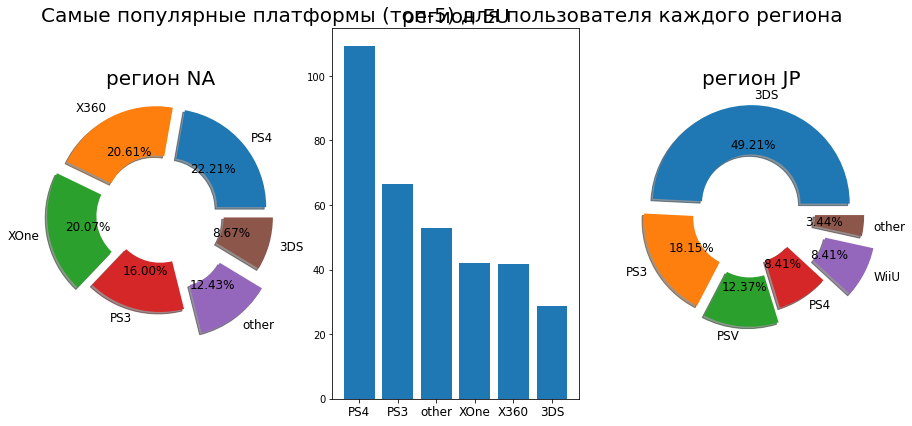

In [ ]:

    labels_na = ["PS4", "X360", "XOne", "PS3", "other","3DS"]
    labels_eu = ["PS4", "PS3", "other", "XOne", "X360","3DS"]
    labels_jp = ["3DS", "PS3", "PSV", "PS4", "WiiU","other"]
    explode = (0.1, 0.1, 0.15, 0, 0.3, 0.15)
    plt.figure(figsize=(15, 15))
    plt.rc('font', size=12) #controls default text size
    plt.rc('axes', titlesize=20) #fontsize of the title
    plt.rc('axes', labelsize=10) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
    plt.suptitle('Самые популярные платформы (топ-5) для пользователя каждого региона',fontsize = 20,y=0.9)

    plt.subplot(2, 3, 1)
    plt.pie(year_sort_na['na_sales'], autopct='%.2f%%', labels=labels_na,explode=explode, wedgeprops=dict(width=0.5),
            shadow=True)
    plt.title("регион NA")

    # !!! Текущая ячейка - 2
    plt.subplot(2, 3, 2)
    plt.bar(["PS4", "PS3", "other", "XOne", "X360","3DS"], year_sort_eu['eu_sales'])
    plt.title("регион EU")

    # !!! Текущая ячейка - 3
    plt.subplot(2, 3, 3)
    plt.pie(year_sort_jp['jp_sales'], autopct='%.2f%%', labels=labels_jp,explode=explode, wedgeprops=dict(width=0.5),
            shadow=True)
    plt.title("регион JP")

In [ ]:
# check
year_sort_eu

,platform,eu_sales
2,PS4,109.31
1,PS3,66.55
5,other,52.75
4,XOne,41.96
3,X360,41.81
0,3DS,28.63


### Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

In [ ]:
year_sort_na =year_sort.copy()
top_na=year_sort_na.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales',
                                                                                    ascending=False).head(5)['genre'].tolist()

year_sort_na['genre'] = year_sort_na['genre'].where(year_sort_na['genre'].isin(top_na), other='other')
year_sort_na = year_sort_na.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)

year_sort_eu =year_sort.copy()
top_eu=year_sort_eu.groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales',
                                                                                    ascending=False).head(5)['genre'].tolist()

year_sort_eu['genre'] = year_sort_eu['genre'].where(year_sort_eu['genre'].isin(top_eu), other='other')
year_sort_eu = year_sort_eu.groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)

year_sort_jp =year_sort.copy()
top_jp=year_sort_jp.groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales',
                                                                                    ascending=False).head(5)['genre'].tolist()

year_sort_jp['genre'] = year_sort_jp['genre'].where(year_sort_jp['genre'].isin(top_jp), other='other')
year_sort_jp = year_sort_jp.groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)
year_sort_jp

,genre,jp_sales
3,Role-Playing,44.43
0,Action,33.42
5,other,23.01
2,Misc,8.16
1,Fighting,6.90
4,Shooter,5.55


Text(0.5, 1.0, 'регион JP')

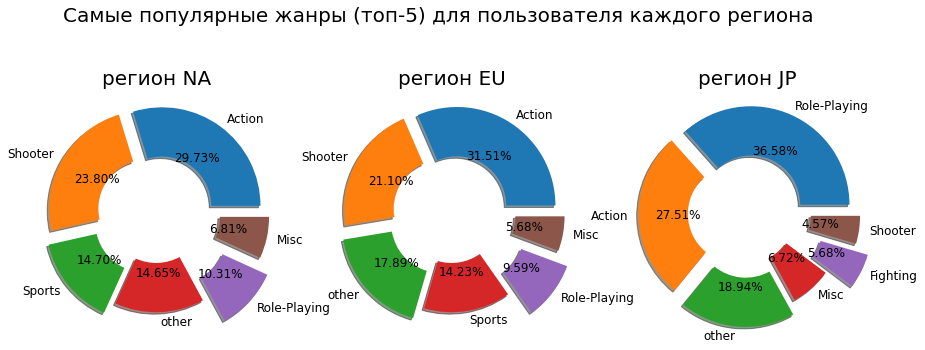

In [ ]:
    labels_na = ["Action", "Shooter", "Sports", "other", "Role-Playing","Misc"]
    labels_eu = ["Action", "Shooter", "other", "Sports", "Role-Playing","Misc"]
    labels_jp = ["Role-Playing", "Action", "other", "Misc", "Fighting","Shooter"]
    explode = (0.1, 0.1, 0.15, 0, 0.3, 0.15)
    plt.figure(figsize=(15, 15))
    plt.rc('font', size=12) #controls default text size
    plt.rc('axes', titlesize=20) #fontsize of the title
    plt.rc('axes', labelsize=10) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
    plt.suptitle('Самые популярные жанры (топ-5) для пользователя каждого региона',fontsize = 20,y=0.9)

    plt.subplot(2, 3, 1)
    plt.pie(year_sort_na['na_sales'], autopct='%.2f%%', labels=labels_na,explode=explode, wedgeprops=dict(width=0.5),
            shadow=True)
    plt.title("регион NA")

    # !!! Текущая ячейка - 2
    plt.subplot(2, 3, 2)
    plt.pie(year_sort_eu['eu_sales'], autopct='%.2f%%', labels=labels_eu,explode=explode, wedgeprops=dict(width=0.5),
            shadow=True)
    plt.title("регион EU")

    # !!! Текущая ячейка - 3
    plt.subplot(2, 3, 3)
    plt.pie(year_sort_jp['jp_sales'], autopct='%.2f%%', labels=labels_jp,explode=explode, wedgeprops=dict(width=0.5),
            shadow=True)
    plt.title("регион JP")

Самыми популярными жанрами игр в Северной Америки являются Action, Shooter, Sports, Role-Playing, Misc. Доля других игр составляет 14.65%.

Самыми популярными жанрами игр в Европе являются Action, Shooter, Sports, Role-Playing, Misc. Доля других игр составляет 17.89%. У регионов NA и EU, также схоже предпочтения в жанрах игр.

Самыми популярными жанрами игр в Японии являются Role-Playing, Action, Misc, Fighting, Shooter. Доля других игр составляет 18.94%.

### Как рейтинг ESRB влияет на продажи в каждом регионе (NA, EU, JP)

Посмотрим количество выставленных рейтингов играм. В датафрейме у 6676 игр отсутствует рейтинг.

In [ ]:
data.value_counts('rating')

rating
no rating    6676
E            3931
T            2905
M            1537
E10+         1393
RP              1
dtype: int64

Рейтинги делятся на возврастные категории:

 * E («Everyone») — «Для всех»
 * E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
 * T («Teen») — «Подросткам»
 * M («Mature») — «Для взрослых»
 * RP («Rating Pending») — «Рейтинг ожидается»


Преобразуем рейтиг в числовые переменные для вычисления корреляции.

,na_sales,rating
na_sales,1.000000,-0.142572
rating,-0.142572,1.000000


<AxesSubplot:xlabel='rating'>

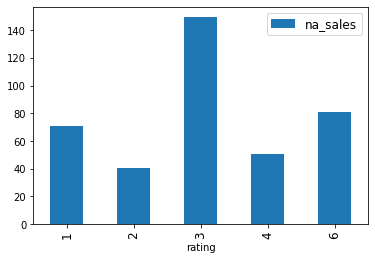

In [ ]:
t = year_sort.replace({'rating' : { 'E' : 1, 'T' : 2, 'M' : 3, 'E10+' : 4, 'RP' : 5, 'no rating' : 6}})
display(t[['na_sales', 'rating']].corr())
t_na= t.pivot_table(index='rating', values=('na_sales'), aggfunc='sum').reset_index()
t_na.plot(x='rating', y='na_sales', kind='bar')

Из графика видно, что в Северной Америке чаще остальных продаются игры с рейтингом  M. Дальше идут без рейтинга и игры с рейтингом `E`. Корреляции между проданными играми в Северной Америки и рейтингом ESRB нет.

,eu_sales,rating
eu_sales,1.000000,-0.144126
rating,-0.144126,1.000000


<AxesSubplot:xlabel='rating'>

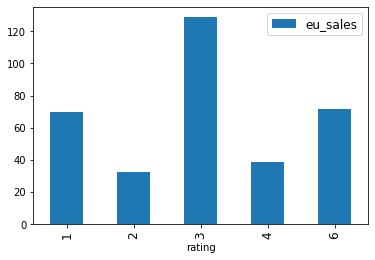

In [ ]:
display(t[['eu_sales', 'rating']].corr())
t_eu= t.pivot_table(index='rating', values=('eu_sales'), aggfunc='sum').reset_index()
t_eu.plot(x='rating', y='eu_sales', kind='bar')

Из графика видно, что в Европе, также чаще остальных продаются игры с рейтингом  M. Почти наравне идут игры без рейтинга и рейтингом `E`. Корреляции между проданными играми в Европе и рейтингом ESRB нет.

,jp_sales,rating
jp_sales,1.000000,0.056964
rating,0.056964,1.000000


<AxesSubplot:xlabel='rating'>

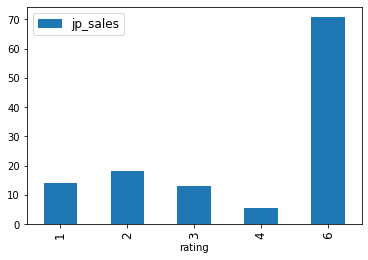

In [ ]:
display(t[['jp_sales', 'rating']].corr())
t_jp= t.pivot_table(index='rating', values=('jp_sales'), aggfunc='sum').reset_index()
t_jp.plot(x='rating', y='jp_sales', kind='bar')

В Японии в основном покупают игры без рейтинга. Корреляции между проданными играми в Японии и рейтингом ESRB нет.

### Вывод

Подводя итог можно составить портреты игроков различных регионов.

1) Игрок из Северной Америке ему от 17 лет он любит играть в игры в жанре Action, Shooter и Sport. У него есть приставка PS4, X360 или XOne. На них он играет в игры серии GTA или Call of Duty, либо в спортивные игры серии NFL.

2) Игроку из Европы также больше 17 лет. Он любит точно играть в игры в жанре Action, Shooter и другие. Он больше предпочитает приставки PS4 или PS3. Его любимые игры GTA и Call of Duty, а в жанре спортивных он предпочитает FIFA.

3) Игрок из Японии в жанре игр больше остальных предпочитает Role-playing, Action и другие. Большее предпочтение он отдает портативной консоли 3DS, где он играет в игры серии Pokemon и Mario. Дома на стационарной платформе PS3, он играет в игры серии Final Fantasy и Dragon Quest.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Зададим уровень значимости — 5%

In [ ]:
alpha = 0.05

Сформулируем гипотезы:

Н<sub>0</sub> X<sup style="margin-left:-8px">&#175;</sup><sub> XOne</sub> = X<sup style="margin-left:-7px">&#175;</sup><sub> PC</sub>

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н<sub>1</sub> X<sup style="margin-left:-8px">&#175;</sup><sub> XOne</sub> &#8800; X<sup style="margin-left:-7px">&#175;</sup><sub> PC</sub>

Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Н<sub>0</sub> всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения.

Преобразуем данные датафрейма в списки и удалил пустые значения.

In [ ]:
xone_rating = year_sort.query('platform=="XOne"')['user_score'].dropna ().tolist()
pc_rating = year_sort.query('platform=="PC"')['user_score'].dropna ().tolist()

Проверим размер выборок, если размер различаются, то у параметра equal_var (от англ. equal variance — «равная дисперсия») выставляем False

In [ ]:
print(len(xone_rating))
len(pc_rating)

116


110

Проверяем гипотезу

In [ ]:
results = st.ttest_ind(
    xone_rating,
    pc_rating,equal_var=False)

print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2867036680187624
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие примерно равно 28%. Это больше уровня значимости, который мы задали в 5%, следовательно мы не отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, нулевая гипотеза подтвердилась.


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы:

Н<sub>0</sub> X<sup style="margin-left:-8px">&#175;</sup><sub> Action</sub> = X<sup style="margin-left:-7px">&#175;</sup><sub> Sports</sub>

Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н<sub>1</sub> X<sup style="margin-left:-8px">&#175;</sup><sub> Action</sub> &#8800; X<sup style="margin-left:-7px">&#175;</sup><sub> Sports</sub>

Средние пользовательские рейтинги жанров Action и Sports разные.

Н<sub>0</sub> всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения.

Преобразуем данные датафрейма в списки и удалил пустые значения.

In [ ]:
action_rating = year_sort.query('genre=="Action"')['user_score'].dropna ().tolist()
sports_rating = year_sort.query('genre=="Sports"')['user_score'].dropna ().tolist()


Проверим размер выборок, если размер различаются, то у параметра equal_var (от англ. equal variance — «равная дисперсия») выставляем False

In [ ]:
print(len(action_rating))
len(sports_rating)

304


123

Проверяем гипотезу

In [ ]:
results = st.ttest_ind(
    action_rating,
    sports_rating,equal_var=False)

print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.507673706253593e-19
Отвергаем нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие примерно равно 0,00000000000000000035. Это меньше уровня значимости, который мы задали в 5%, следовательно мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports не равны.

## Общий вывод

В ходе проведения исследования о продаже компьютерных игры в интернет-магазине, было выполненно пять этапов:

1) Обзор данных.

2) Предобработка данных.

3) Проведение исследовательского анализа.

4) Составление портрета пользователя каждого региона (NA, EU, JP).

5) Проверка гипотез.

<b>На этапе обзора данных мы ознакомились с датафреймом games.csv. Были выяленны:</b>
* пропуски в данных
* несоответствие типов данных


<b>На этапе предобработки были устраненые следущие ошибки:</b>

1) Названия столбцов приведены к общему виду (snake_case)

2) Удалены неявные дубликаты игр

3) Удаленны строки с пропусками в столбцах name(название игры) и year_of_release(дата выхода игры).

4) Значения tbd было перезаписано в NaN, так как аббревиатура это и означает.

5) Столбцы `user_score`, `year_of_release` преобразованы в подходящие форматы, в столбце `critic_score` оценки были приведены из десяток в единицы.

6) Пропуски в столбце `rating` заменены на `no rating` в остальных столбцах были пропущенны, так как не хватает данных для их восстановления, а заполнение средним или медианой сильно исказит информацию и приведет к неверным выводам.

7) Создан новый столбец all_sales содержащий информацию о количестве проданных копий игры во всех регионах.

8) В столбце `rating` заменили значение `K-A` на `E`, так как оно является устаревшим обозначением. Значение `EC` заменили  на `E`, так как оно подходит под эту категорию. Заменили значение `AO` на `M` так как возврастное ограничение почти одинаковое.


<b>В ходе проведения исследовательского анализа было выявленно:</b>

1) В среднем в год выходит более 720 игр

2) Новые платформы в течении 2-3 лет входят в пик по проданным играм. В среднем платформы пользуются популярностью около 10 лет.

3) Был выбран актуальный период с 2013-2015гг. и минимальный порог проданных игр(от 15 млн.) на платформу. В результате были отобранны 8 платформ(PS4, PS3, X360, XOne, 3DS, WiiU, PSV) с которым производился дальнейший анализ
  
4) В основном игры продаются до 2.5 млн. копий. Большие выбросы наблюдаюся у платформ X360, PS4 и 3DS за установленный период.

5) Также выяснилось, что мнение критиков и игроков не влияет на покупаемость игр.

6) Самыми успешными жанрами по медианным продажам являются жанры `Shooter`, `Simulation`,`Strategy`,`Racing`и `Misc`. Самыми стабильными и успешно продающимися жанрами являются `Shooter`, `Simulation`.

<b>На этапе составление портретов пользователей каждого региона (NA, EU, JP)</b>, были определены самые популярные платформы, жанры и игры в каждом регионе. Также было проверенно как рейтинг ESRB влияет на продажи игр в каждом регионе.

Самыми популярными игровыми платформами в Северной Америки являются PS4(22.21%), X360(20.61%), XOne(20.07%), PS3(16%), 3DS(8.67%). Доля других платформ составляет 12.43%.
Самыми популярными игровыми платформами в Европе являются PS4(32.05%), PS3(19.52%), XOne(12.3%), X360(12.26%), 3DS(8.40%). Доля других платформ составляет 15.47%.
В Японии самой популярной приставкой является 3DS, 49,21% игроков отдают предпочтение ей. Дальше идут PS3(18.15%), PSV(12.37%), PS4(8.41%), WiiU(8.41%). Доля других платформ небольшая и составляет 3.44%.

Самыми популярными жанрами игр в Северной Америки являются Action(29.73%), Shooter(23.8%), Sports(14.7%), Role-Playing(10.31%), Misc(6.81%). Доля других игр составляет 14.65%.
Самыми популярными жанрами игр в Европе являются Action(31.51%), Shooter(21.1%), Sports(14.23%), Role-Playing(9.59%), Misc(5.68%). Доля других игр составляет 17.89%. У регионов NA и EU, также схоже предпочтения в жанрах игр.
Самыми популярными жанрами игр в Японии являются Role-Playing(36.58%), Action(27.51%), Misc(6.72%), Fighting(5.68%), Shooter(4.57%). Доля других игр составляет 18.94%.
    
В регионе NA популярные платформы PS4, X360 или XOne, жанры игры Action, Shooter и Sport и сами игры серии
GTA или Call of Duty, либо в спортивные игры NFL.

В регионе EU популярные платформы PS4 или PS3, жанры игры Action, Shooter и другие и сами игры серии GTA, Call of Duty и FIFA.

В регионе JP очень популярна платформа 3DS, жанры Role-playing, Action и другие, A, игры серии Mario, Pokemon, Dragon Quest и Final Fantasy.

Рейтинг ESRB не влияет на продажи ни в одном из регионов.

<b>На последнем проводила проверка гипотез:</b>

 1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые? Данные по этой гипотезе не противрочет ей, мы её не отвергаем.

 2) Средние пользовательские рейтинги жанров Action и Sports равны? Полученные резуьтаты противоречат данной гипотезе
